In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MentalHealth.csv")

In [ ]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,12-09-2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,26-09-2015 01:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,07-11-2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,30-11-2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
df.drop('comments',axis=1,inplace=True)
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,12-09-2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,26-09-2015 01:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,07-11-2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,30-11-2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [ ]:
pd.get_dummies(df['state'])

,AL,AZ,CA,CO,CT,DC,FL,GA,IA,ID,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [ ]:
df['self_employed'].mode()

0    No
dtype: object

In [ ]:
df['self_employed'].fillna('No', inplace=True)

In [ ]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [ ]:
df['work_interfere'].fillna('Sometimes', inplace=True)

In [ ]:
df.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
df['Year']=df['Timestamp'].apply(lambda x: np.int(x[6:10]))
df['Month']=df['Timestamp'].apply(lambda x: np.int(x[3:5]))
df['Day']=df['Timestamp'].apply(lambda x: np.int(x[0:2]))

df['Hour']=df['Timestamp'].apply(lambda x: np.int(x[11:13]))
df['Minute']=df['Timestamp'].apply(lambda x: np.int(x[14:16]))


df.drop('Timestamp',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [ ]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute
0,37,Female,United States,IL,No,No,Yes,Often,Jun-25,No,...,Yes,No,Maybe,Yes,No,2014,8,27,11,29
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,...,No,No,No,Don't know,No,2014,8,27,11,29
2,32,Male,Canada,NaN,No,No,No,Rarely,Jun-25,No,...,Yes,Yes,Yes,No,No,2014,8,27,11,29
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,No,Maybe,Maybe,No,Yes,2014,8,27,11,29
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,Yes,Yes,Yes,Don't know,No,2014,8,27,11,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,...,Some of them,No,No,Don't know,No,2015,9,12,11,17
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,No,No,Yes,No,2015,9,26,1,7
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,No,No,No,No,No,2015,11,7,12,36
1257,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,...,No,No,No,No,No,2015,11,30,21,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [ ]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Afric

In [ ]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [ ]:
def gender_encoder(n):
  if n.lower()[0]=='f':
    return 0
  elif n.lower()[0] == 'm':
    return 1
  else:
    return 2

df['Gender']=df['Gender'].apply(gender_encoder)

In [ ]:
df['Gender'].value_counts()

1    988
0    244
2     27
Name: Gender, dtype: int64

In [ ]:
df.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Year', 'Month', 'Day', 'Hour',
       'Minute'],
      dtype='object')

In [ ]:
binary_freatures=[
    'self_employed', 
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
    ]
ordinal_features=['work_interfere']
nominal_features=['Country', 'state', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview', 'mental_vs_physical']

In [ ]:
def binary_encoder(df, columns, p_values):
  df=df.copy()
  for column, p_value in zip(columns, p_values):
    df[column]=df[column].apply(lambda x:1 if x==p_value else 0)
  return df
def ordinal_encoder(df, columns, orderings):
  df=df.copy()
  for column, ordering in zip(columns, orderings):
    df[column]=df[column].apply(lambda x:ordering.index(x))
  return df
def onehot_encoder(df, columns, prefixes):
  df=df.copy()
  for column, prefix in zip(columns, prefixes):
    d=pd.get_dummies(df[column],prefix)
    df=pd.concat([df,d],axis=1)
    df=df.drop(column,axis=1)
  return df

In [ ]:
b_p_values=['Yes' for f in binary_freatures]

o_orderings=[['Never','Rarely','Sometimes','Often'],['1-5','6-25','26-100','100-500','500-1000','More than 1000']]

n_prefixes=['co','st','re','be','ca','we','se','an','le','mc','ph','cw','su','mi','pi','mp']

In [ ]:
df.drop('no_employees',axis=1,inplace=True)

In [ ]:
df=binary_encoder(df,columns=binary_freatures,p_values=b_p_values)

df=ordinal_encoder(df,columns=ordinal_features,orderings=o_orderings)

df=onehot_encoder(df,columns=nominal_features,prefixes=n_prefixes) 

In [ ]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,obs_consequence,Year,...,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,37,0,0,0,Yes,3,0,1,0,2014,...,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,No,1,0,0,0,2014,...,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,No,1,0,1,0,2014,...,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,Yes,3,0,1,1,2014,...,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,No,0,1,1,0,2014,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,0,1,0,2015,...,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,Yes,3,1,1,0,2015,...,1,0,1,0,0,1,0,0,0,1
1256,34,1,0,1,Yes,2,0,1,0,2015,...,0,0,1,0,0,1,0,0,1,0
1257,46,0,0,0,No,2,1,1,0,2015,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df=binary_encoder(df,columns=['treatment'],p_values=['Yes'])

In [ ]:
print(len(df.select_dtypes('object').columns))

0


In [ ]:
df.isna().sum().sum()

0

In [ ]:
y=df['treatment'].copy()
X=df.drop('treatment',axis=1).copy()

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#Training

In [ ]:
X.shape

(1259, 147)

In [ ]:
i=tf.keras.Input(shape=(X.shape[1],))
x=tf.keras.layers.Dense(1024,activation='relu')(i)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
o=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(i,o)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])

history=model.fit(X_train,y_train,validation_split=0.2,batch_size=64,epochs=500,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/500
11/11 [==============================] - 2s 71ms/step - loss: 0.6843 - accuracy: 0.6080 - auc: 0.6606 - val_loss: 0.6345 - val_accuracy: 0.7232 - val_auc: 0.7563 - lr: 0.0010
Epoch 2/500
11/11 [==============================] - 0s 34ms/step - loss: 0.4466 - accuracy: 0.7997 - auc: 0.8750 - val_loss: 0.5665 - val_accuracy: 0.7288 - val_auc: 0.7924 - lr: 0.0010
Epoch 3/500
11/11 [==============================] - 0s 34ms/step - loss: 0.3432 - accuracy: 0.8636 - auc: 0.9311 - val_loss: 0.6363 - val_accuracy: 0.7119 - val_auc: 0.7901 - lr: 0.0010
Epoch 4/500
11/11 [==============================] - 0s 40ms/step - loss: 0.2619 - accuracy: 0.8977 - auc: 0.9641 - val_loss: 0.6478 - val_accuracy: 0.7175 - val_auc: 0.7945 - lr: 0.0010
Epoch 5/500
11/11 [==============================] - 0s 35ms/step - loss: 0.1860 - accuracy: 0.9460 - auc: 0.9881 - val_loss: 0.7444 - val_accuracy: 0.7232 - val_auc: 0.7697 - lr: 0.0010
Epoch 6/500
11/11 [==============================] - 0s 35ms/step

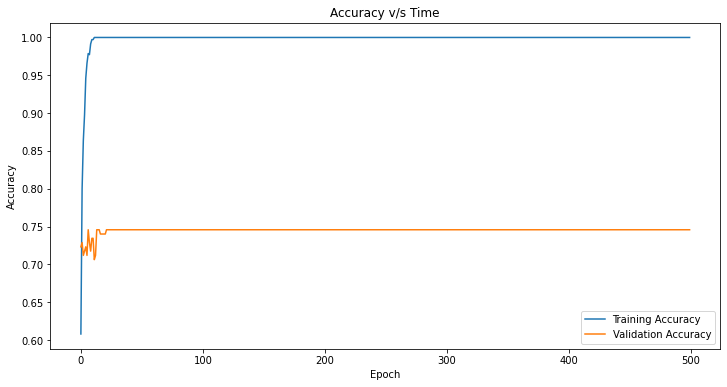

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(500),history.history['accuracy'],label='Training Accuracy')
plt.plot(range(500),history.history['val_accuracy'],label='Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

NameError: ignored

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
model.evaluate(X_test,y_test)